In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle
import scipy
from scipy import signal
import sympy as sy
from IPython.display import display
from scipy.io.wavfile import write as wavWrite
import h5py
import ast
import os
import sys
import shutil
sy.init_printing()
#import tikzplotlib

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Settings pour les figures matplotlib
mpl.rcParams['figure.dpi'] = 72

#%matplotlib nbagg

FIGSIZE  = (10,5)
FONTSIZE = 30
TICK_FONTSIZE = 24
LEGEND_FONTSIZE = 22

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
plt.rc('text', usetex=True)
LATEX_FIG_PATH = "../01_FIGS/"
FIGS_PATH      = "02_figs/"
PPTY_XVBAR = {'c':  'r', 
              'linestyle':'-.', 
              'linewidth':0.75,
             }
PPTY_LEG = { 'fontsize' : 16,
             'loc'      : 'upper left',
           }

fmt = lambda s: r'$%s_{%s}$' % (s.split('_', 1)[0], s.split('_', 1)[1].replace('_', ''))


In [3]:
#%% Loading dataset
%store -r filename 
#filename = '03_data/simu.05_05.15_10.h5'
print(filename)

fid = h5py.File(filename, 'r')
fid.flush()

metadata = fid["metadata"]
data     = fid["data_simu"]
model    = fid["model"]

date_now = metadata["date_now"][:]
config = ast.literal_eval(str(metadata["config"][0]))
print(*date_now)

03_data/simu.07_10.16_16.h5
7 10 16 16


In [4]:
SAVE_FIG = False
if SAVE_FIG:
    FOLDER_PATH = FIGS_PATH + "simu_{0}_{1}.{2}_{3}".format(*(str(val).zfill(2) for val in date_now))
    os.mkdir(FOLDER_PATH)
    
xbar = [0.15, 0.48, 0.78]

In [5]:
t = data["t"][:]
tmax = max(t)

indt = (t <= tmax) * (t >= 0.)

Nx = model["Nx"][0]

In [6]:
# Calcule du bilan de puissance
dEdt = np.prod([data["dxH"][:,0],data["dtx"][:,0]], axis=0)
for i in range(1,Nx):
    prod = np.prod([data["dxH"][:,i],data["dtx"][:,i]], axis=0)
    dEdt = np.add(dEdt, prod)

/home/victorw/.virtualenvs/pyphs/lib/python3.8/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-6-753269c28894>:5: RuntimeWarning: invalid value encountered in add
  dEdt = np.add(dEdt, prod)


<IPython.core.display.Javascript object>


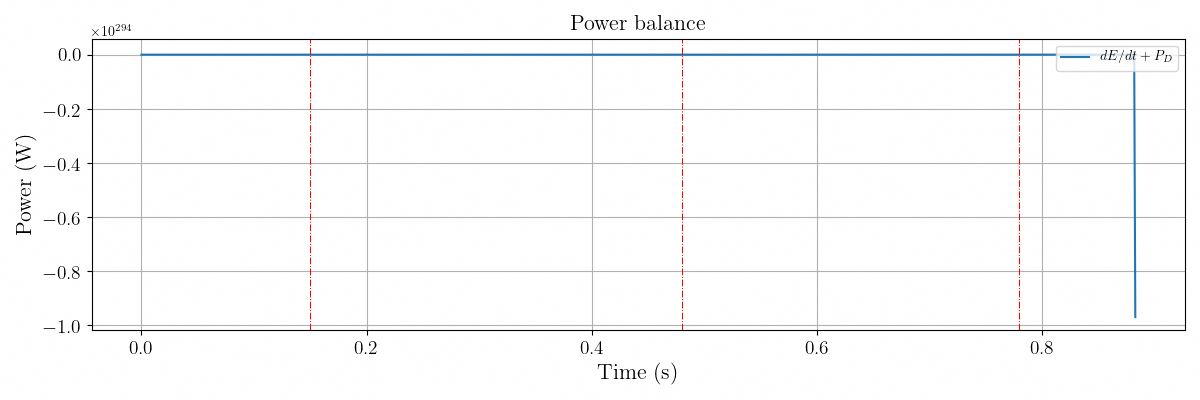

In [7]:
%matplotlib nbagg
fig = plt.figure(figsize=(12, 4))
ax = plt.gca()

# ---- Power balance --- #
#ax.semilogy(t[indt], (dEdt)[indt])
ax.plot(t[indt], (dEdt)[indt])
ax.set_title(r'Power balance', fontsize=16)
ax.grid()

ax.legend([r'$dE/dt + P_D$', '$-P_{ext}$'], loc="upper right")
ax.set_ylabel('Power (W)', fontsize=16)
ax.set_xlabel('Time (s)', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=10)
#plt.ylim([-1e-4, 1e-3])

for bar in xbar:
    ax.axvline(x=bar, **PPTY_XVBAR)
plt.tight_layout()



if SAVE_FIG:
    title = "power_balance"
    tmp_path = os.path.join(FOLDER_PATH,title)
    plt.savefig(tmp_path + '.png', format='png', dpi=300)
    plt.savefig(tmp_path + '.pdf', format='pdf')

<IPython.core.display.Javascript object>


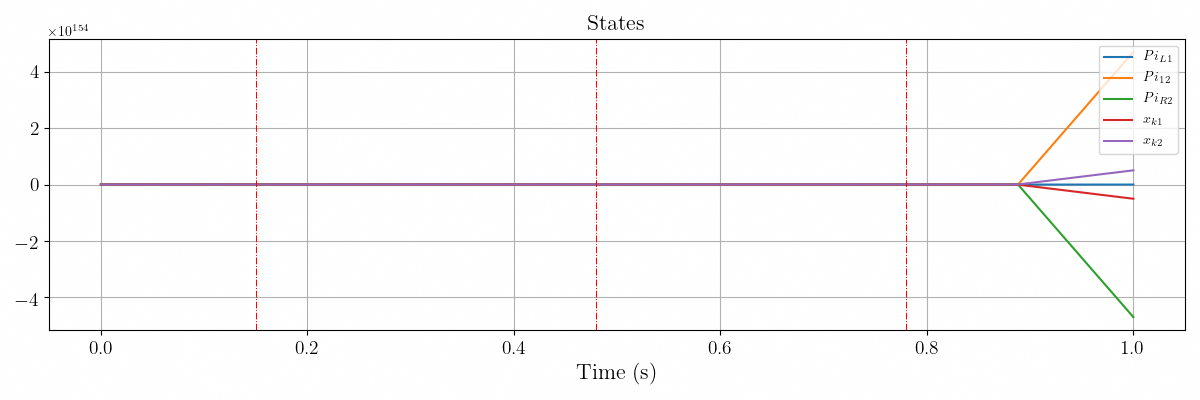

In [8]:
fig = plt.figure(figsize=(12, 4))
ax = plt.gca()

# ---- Power balance --- #
ax.plot(t[indt],data['x'][indt,:])
ax.set_title(r'States', fontsize=16)
ax.grid()

lab = model['x_label'][:]
for i in range(len(lab)):
    lab[i] = fmt(lab[i])


#ax.set_ylabel('Power (W)', fontsize=16)
ax.legend(lab, loc="upper right")
ax.set_xlabel('Time (s)', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=10)

#plt.ylim([-1e-4, 1e-3])
#plt.xlim([0, 1e-3])
for bar in xbar:
    ax.axvline(x=bar, **PPTY_XVBAR)
plt.tight_layout()



if SAVE_FIG:
    title = "power_balance"
    tmp_path = os.path.join(FOLDER_PATH,title)
    plt.savefig(tmp_path + '.png', format='png', dpi=300)
    plt.savefig(tmp_path + '.pdf', format='pdf')